In [4]:
# Functions to generate and plot a tiling, and to define its corresponding grap

phi = (1+sqrt(5))/2   # = golden ratio
l = 1/phi

def plot_tile(t, *colors):
    """Function to plot a tile t of the form (code, A,B,C,D) where A,B,C,D are points (complex numbers).
    You can optionally specify the colors of the tiles (darts first, then kytes) and optionally the color of the border of the tiles,
    then the aspect ratio."""
    code = t[0]
    if len(colors) >= 2:
        color = colors[code]
        if len(colors) >= 3 : 
            side_color = colors[2]
            if len(colors) >= 4:
                aspect = colors[3]
            else: aspect = 1.0
        else: side_color = "black"
    else:
        if code == 0 : color = 'red'
        else: color = 'blue'
        side_color = 'black'
    g = Graphics()
    g += polygon(t[1:], color=color, thickness=1, alpha = aspect, axes=False)
    g += polygon(t[1:], color=side_color, thickness=3, fill=False)
    return g

def subdivide(t):
    """
    Function dividing a given tile t :
     - a dart subdivides into 1 kite and 2 half-darts
     - a kite subdivides into 2 kites and 2 half-darts
    Each half-dart is completed into a whole dart
    """
    code, A, B, C, D = t
    if code == 0:
        M = CDF(A + (B-A)/phi)
        N = CDF(A + (D-A)/phi)
        E = CDF(A + exp(2*I*pi/5)*(C-A))
        F = CDF(A + exp(-2*I*pi/5)*(C-A))
        dart1 = (0, D,E,N,C)
        dart2 = (0, B,C,M,F)
        kite = (1, A,M,C,N)
        return (dart1, dart2, kite)
    else:
        P = CDF(B + (A-B)/phi)
        Q = CDF(A + (C-A)/phi)
        R = CDF(D + (A-D)/phi)
        S = CDF(A + exp(2*I*pi/5)*(Q-A))
        T = CDF(A + exp(-2*I*pi/5)*(Q-A))
        return ((0, A,Q,R,S), (0, A,T,P,Q), (1, B,C,Q,P), (1, D,R,Q,C))

def iteration(T,n):
    """
    Function that iteratively divides all tiles of the tiling T, n times
    """
    for k in range(n):
        print "Iteration {}".format(k+1)
        T1 = []
        for t in T:
            S = subdivide(t)
            for s in S:
                T1.append(s)
        T = list(T1)
        # remove doubles
        i = 0
        while i < len(T)-1:
            for j in range(i+1,len(T)):
                if T[i][1] == T[j][1] and all([round(T[i][k].real(),n+2) == round(T[j][k].real(),n+2) and round(T[i][k].imag(),n+2) == round(T[j][k].imag(),n+2) for k in range(1,4)]):
                    T.pop(j)
                    break
            i+=1
    return T

def plot_tiling(T, *colors):
    """Function that plots all tiles in T, using plot_tile"""
    g = Graphics()
    if len(colors) >= 2:
        a,b = colors[0], colors[1]
        if len(colors) >= 3:
            c = colors[2]
            if len(colors) >= 4:
                aspect = colors[3]
            else: aspect = 1.0
            for t in T: g += plot_tile(t, a,b,c, aspect)
        else:
            for t in T: g += plot_tile(t, a,b)
    else:
        for t in T: g += plot_tile(t)
    return g


# Functions to create and plot the corresponding graph

def adjacent_in_Penrose(u,v):
    """
    Simple adjacency function for an edge-to-edge tiling.
    
    INPUT: 2 tuples of the form (code,A,B,C,D) where A,B,C,D are 4 complex numbers.
    """
    zu = set([(round(u[k].real(),10),round(u[k].imag(),10)) for k in range(1,5)])
    zv = set([(round(v[k].real(),10),round(v[k].imag(),10)) for k in range(1,5)])
    if len(zu.intersection(zv)) == 2:
        return True
    else:
        return False
    
def adjacent_in_Penrose_kd(u,v):
    """
    The correct adjacency function for kites and darts Penrose tiling.
    WARNING: has to be fixed (mathematically correct but computationnally wrong)
    """
    if u[0] == 1 and v[0] == 0:
        u,v = v,u
    if u[0] == 0:
        if v[0] == 0:
            if u[1] == v[1] and len({u[2], u[4]}.intersection({v[2], v[4]})) == 1:
                return True
        else:
            if (u[3] in {v[2], v[4]} and v[3] in {u[2], u[4]}) or (u[1] in {v[2], v[4]} and v[1] in {u[2], u[4]}):
                return True
    else:
        if (u[1] == v[1] or u[3] == v[3]) and len({u[2], u[4]}.intersection({v[2], v[4]})) == 1:
            return True
    return False

def Penrose_plot(G):
    g = Graphics()
    for t in G.vertices():
        g += polygon(t[1:5], color='black', fill=False, thickness=1, axes=False)
    return g

In [2]:
# The 7 vertex configurations

phi = (1+sqrt(5))/2
l = 1/phi

def sun():
    return [(1, CDF(0), CDF(exp(2*k*pi/5*I)*exp(-pi/2*I)), CDF(exp((2*k+1)*pi/5*I)*exp(-pi/2*I)), CDF(exp(2*(k+1)*pi/5*I)*exp(-pi/2*I))) for k in range(5)]

def star():
    return [(0, CDF(0), CDF(exp(2*k*pi/5*I)*exp(pi/2*I)), CDF(l*exp((2*k+1)*pi/5*I)*exp(pi/2*I)), CDF(exp(2*(k+1)*pi/5*I)*exp(pi/2*I))) for k in range(5)]

def ace():
    star1 = iteration(sun(),1)
    return [t for t in star1 if t[1].real() == 0 and t[3].imag() < -l^2]

def deuce():
    kite = [(1, CDF(0), CDF(exp(-pi/5*I)*exp(-pi/2*I)), CDF(exp(-pi/2*I)), CDF(exp(pi/5*I)*exp(-pi/2*I)))]
    return iteration(kite,1)

def jack():
    J = [(1, CDF(0), CDF(exp(2*k*pi/5*I)*exp(pi/10*I)), CDF(exp((2*k+1)*pi/5*I)*exp(pi/10*I)), CDF(exp(2*(k+1)*pi/5*I)*exp(pi/10*I))) for k in range(2)]
    J += [(1, CDF(exp(-pi/2*I)), CDF(l*exp(-pi/10*I)), CDF(0), CDF(l*exp(-9*pi/10*I)))]
    J += [(0, CDF(exp(2*k*pi/5*I)*exp(pi/2*I)), CDF(0), CDF(l*exp(-2*k*pi/5*I)*exp(-pi/2*I)), CDF(exp(2*k*pi/5*I)*exp(pi/2*I)+exp(-pi/2*I))) for k in {-1,1}]
    return J

def queen():
    A = CDF(exp(pi/5*I)*exp(pi/2*I))
    B = CDF(exp(-pi/5*I)*exp(pi/2*I))
    C = CDF(exp(-pi/2*I))
    Q = [(0, CDF(0), A, CDF(l*exp(pi/2*I)), B)]
    Q += [(1, P, CDF(P-B), CDF(P+C), CDF(P-A)) for P in {A,B}]
    Q += [(1, C, CDF(C+P*exp(-pi/5*I)), CDF(C+P), CDF(C+P*exp(pi/5*I))) for P in {A,B}]
    return Q

def king():
    A = CDF(exp(-9*pi/10*I))
    B = CDF(exp(-pi/10*I))
    C = CDF(l*exp(-pi/2*I))
    K = [(0, CDF(0), CDF(exp(2*k*pi/5*I)*exp(-pi/10*I)), CDF(l*exp((2*k+1)*pi/5*I)*exp(-pi/10*I)), CDF(exp(2*(k+1)*pi/5*I)*exp(-pi/10*I))) for k in range(3)]
    K += [(1, P, CDF(P+(C-P)*exp(-pi/5*I)), C, CDF(P+(C-P)*exp(pi/5*I))) for P in {A,B}]
    return K

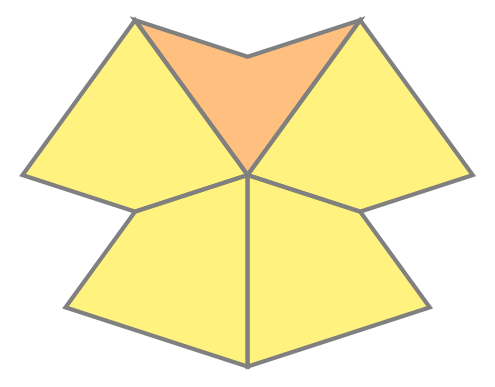

In [9]:
S = plot_tiling(queen(), (1,0.5,0), (1,0.9,0), 'grey', 0.5)
S.save('queen.png')
S.show()

In [11]:
# The kingdoms (sun and ace sic)

def star_empire():
    return iteration(sun(),1)

def deuce_empire():
    return [t for t in star_empire() if t[2].real() > t[2].imag() and t[4].real() > t[4].imag()]

def jack_empire():
    empire = [t for t in star_empire() if t[1].imag() < sin(pi/10) and t[3].imag() < sin(pi/10)]
    A = CDF(exp(-7*pi/10*I))
    B = CDF(exp(-3*pi/10*I))
    empire += [(0, A, CDF(A + l*exp(-pi/2*I)), CDF(A + l^2*exp(-3*pi/10*I)), CDF(exp(-pi/2*I)))]
    empire += [(0, B, CDF(exp(-pi/2*I)), CDF(B + l^2*exp(-7*pi/10*I)), CDF(B + l*exp(-pi/2*I)))]
    for t in sun():
        t = list(t)
        for k in range(1,5):
            t[k] = CDF(l*(t[k] + exp(-pi/2*I)) + exp(-pi/2*I))
        empire += [tuple(t)]
    return empire

def queen_empire():
    return [t for t in king_empire() if t[1].imag() > -(1+l^3) and t[3].imag() > -(1+l^3) and 3*t[1].real()+1 > t[1].imag() and 3*t[3].real()+1 > t[3].imag()]

def king_empire():
    empire = iteration(jack_empire(),1)
    for t in sun()[1:3]:
        t = list(t)
        for k in range(1,5):
            t[k] = CDF(l^2*t[k]*exp(pi/5*I))
        empire += [tuple(t)]
        for k in range(1,5):
            t[k] = CDF(exp(-7*pi/10*I) + t[k]*exp(3*pi/5*I))
        empire += [tuple(t)]
        for k in range(1,5):
            t[k] = CDF(-t[k].real(), t[k].imag())
        empire += [tuple(t)]
    t = list(sun()[4])
    for k in range(1,5):
        t[k] = CDF(l^2*t[k] + exp(9*pi/10*I))
    empire += [tuple(t)]
    t = list(sun()[0])
    for k in range(1,5):
        t[k] = CDF(l^2*t[k] + exp(pi/10*I))
    empire += [tuple(t)]
    return empire

Iteration 1


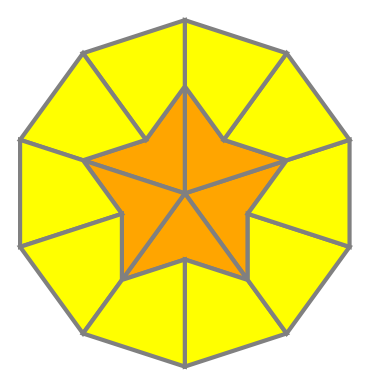

In [12]:
S = plot_tiling(star_empire(), 'orange', 'yellow', 'grey')
S.show()
S.save('star_empire.png')

### 